In [1]:
%run lib.py

In [2]:
np.set_printoptions(edgeitems=10, linewidth=80)

---

In [3]:
score_df = pd.read_csv('data/text_to_topic_scores.csv', index_col=0)

texts_pr = pd.read_csv('texts_preproc_relevant.csv', index_col=0)

texts = pd.read_csv('papers_parsed_relevant.csv', index_col=0)\
    .loc[:, ['journal', 'date_parsed']]\
    .reindex(texts_pr.index)\
    .reset_index(drop=True)

In [4]:
score_df

,1.1.1.1. -- Sample complexity and generalization bounds,1.1.1.2. -- Boolean function learning,1.1.1.3. -- Unsupervised learning and clustering,1.1.1.4.1. -- Support vector machines,1.1.1.4.2. -- Gaussian processes,1.1.1.4.3. -- Modelling,1.1.1.5. -- Boosting,1.1.1.6. -- Bayesian analysis,1.1.1.7. -- Inductive inference,1.1.1.8. -- Online learning theory,...,5.2.4.1.3. -- Policy iteration,5.2.4.1.4. -- Temporal difference learning,5.2.4.1.5. -- Approximate dynamic programming methods,5.2.4.2.1. -- Boosting,5.2.4.2.2. -- Bagging,5.2.4.2.3. -- Fusion of classifiers,5.2.4.3.1 -- Spectral clustering,5.2.4.4. -- Feature selection,5.2.4.5.1 -- Generalized eigenvalue,5.2.5. -- Cross-validation
0,0.146779,0.148864,0.317016,0.136573,0.155241,0.137437,0.160465,0.281274,0.246067,0.158224,...,0.189453,0.199818,0.207490,0.160465,0.178204,0.119531,0.329988,0.319550,0.130482,0.217381
1,0.213833,0.135648,0.308386,0.097235,0.163988,0.111039,0.176288,0.231717,0.216278,0.109494,...,0.218900,0.210582,0.158816,0.176288,0.106835,0.148433,0.318810,0.238902,0.113895,0.153735
2,0.130861,0.212880,0.342364,0.228501,0.131850,0.151590,0.157596,0.081035,0.145126,0.226929,...,0.208125,0.223977,0.127286,0.157596,0.155013,0.269969,0.433328,0.199925,0.142234,0.241214
3,0.120147,0.253489,0.352651,0.149955,0.232027,0.246658,0.161025,0.102643,0.221068,0.288539,...,0.171006,0.247210,0.117086,0.161025,0.101487,0.139135,0.357909,0.198067,0.102722,0.186526
4,0.249352,0.133184,0.307590,0.101416,0.140609,0.099105,0.104585,0.148708,0.282816,0.104701,...,0.176652,0.323895,0.161467,0.104585,0.110777,0.119197,0.403607,0.133150,0.226799,0.203539
5,0.201564,0.227974,0.317781,0.208838,0.115182,0.236364,0.123501,0.087960,0.198322,0.236425,...,0.182536,0.223695,0.160219,0.123501,0.088216,0.163189,0.325475,0.228125,0.101625,0.179478
6,0.177392,0.223245,0.611876,0.151325,0.138115,0.114294,0.165034,0.117744,0.157261,0.228703,...,0.203409,0.350850,0.235056,0.165034,0.168134,0.135912,0.407228,0.138567,0.122096,0.201846
7,0.166423,0.139857,0.381959,0.176999,0.107430,0.117128,0.183612,0.122425,0.245228,0.167854,...,0.161591,0.252487,0.162493,0.183612,0.111283,0.139458,0.451132,0.277890,0.145228,0.142365
8,0.246698,0.250485,0.566290,0.218441,0.134450,0.118486,0.096192,0.256354,0.206387,0.369564,...,0.178881,0.322083,0.165166,0.096192,0.085929,0.268450,0.303687,0.322109,0.287601,0.245244
9,0.192792,0.153208,0.415652,0.111682,0.206287,0.107320,0.187159,0.109417,0.204001,0.116916,...,0.198469,0.238937,0.211841,0.187159,0.164249,0.286287,0.417164,0.331842,0.220369,0.227139


---
Get random sample:

In [5]:
def random_subset(df, seed=42, frac=0.2):
    return df.sample(frac=frac, random_state=seed)

# score_df.pipe(random_subset, seed=43)

---

Create & transform corelevance matrix

In [6]:
from topic_corelevance import TopicCorelevanceBuilder
from lapin import LapinTransformer

In [7]:
score_df_subset = score_df.pipe(random_subset, seed=42)

subset_corelevance = TopicCorelevanceBuilder(score_df_subset, 0.4).corelevance

In [8]:
subset_corelevance_tr = LapinTransformer(subset_corelevance).Lp

---
Apply fuzzy clustering

In [9]:
from faddis import FADDIS

import logging
logging.basicConfig(level='INFO')
logging.getLogger('FADDIS').setLevel('INFO')

In [10]:
clu, intens, contr = FADDIS(max_clusters=100).predict(subset_corelevance_tr)

INFO:FADDIS:i = 0, xi = 0.8742, sqrt(xi) = 0.9350
INFO:FADDIS:E = 349.2459
INFO:FADDIS:i = 1, xi = 0.8978, sqrt(xi) = 0.9475
INFO:FADDIS:E = 348.4399
INFO:FADDIS:i = 2, xi = 0.8546, sqrt(xi) = 0.9244
INFO:FADDIS:E = 347.7096
INFO:FADDIS:i = 3, xi = 0.7765, sqrt(xi) = 0.8812
INFO:FADDIS:E = 347.1066
INFO:FADDIS:i = 4, xi = 0.7284, sqrt(xi) = 0.8535
INFO:FADDIS:E = 346.5760
INFO:FADDIS:i = 5, xi = 0.6171, sqrt(xi) = 0.7856
INFO:FADDIS:E = 346.1952
INFO:FADDIS:i = 6, xi = 0.6032, sqrt(xi) = 0.7766
INFO:FADDIS:E = 345.8314
INFO:FADDIS:i = 7, xi = 0.5278, sqrt(xi) = 0.7265
INFO:FADDIS:E = 345.5528
INFO:FADDIS:i = 8, xi = 0.6622, sqrt(xi) = 0.8137
INFO:FADDIS:E = 345.1144
INFO:FADDIS:i = 9, xi = 0.6174, sqrt(xi) = 0.7857
INFO:FADDIS:E = 344.7332
INFO:FADDIS:i = 10, xi = 0.2897, sqrt(xi) = 0.5383
INFO:FADDIS:E = 344.6493
INFO:FADDIS:i = 11, xi = 0.3757, sqrt(xi) = 0.6130
INFO:FADDIS:E = 344.5081
INFO:FADDIS:i = 12, xi = 0.5259, sqrt(xi) = 0.7252
INFO:FADDIS:E = 344.2316
INFO:FADDIS:i = 13, xi

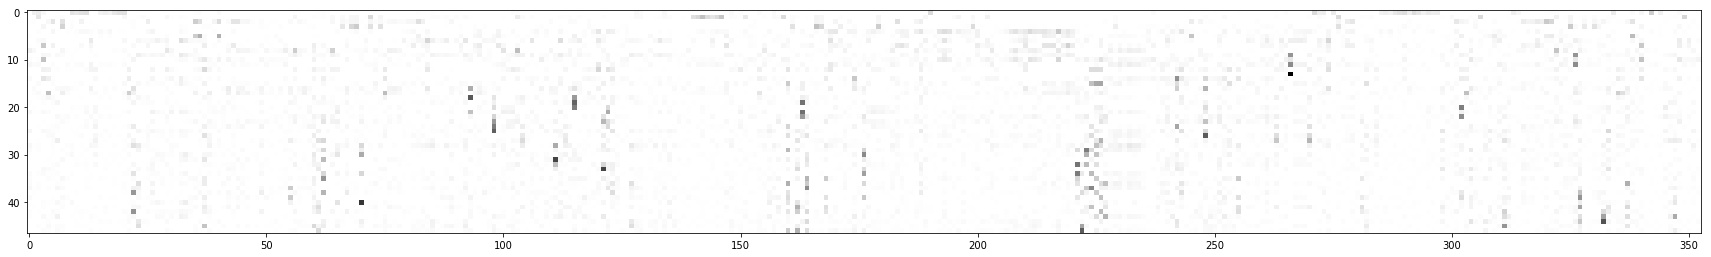

In [11]:
plt.figure(figsize=(30, 22))
plt.imshow(clu, cmap='Greys');

---

Alltogether

In [12]:
from tqdm import tqdm_notebook as tqdm

logging.getLogger('FADDIS').setLevel('WARNING')

In [15]:
def build_clusters_on_random_subsets(n_trials, frac=0.2):
    
    results = []
    
    for seed in tqdm(range(n_trials)):
        score_df_subset = score_df.pipe(random_subset, seed=seed, frac=frac)

        subset_corelevance = TopicCorelevanceBuilder(score_df_subset, 0.4).corelevance
        subset_corelevance_tr = LapinTransformer(subset_corelevance).Lp
        r = FADDIS(max_clusters=100).predict(subset_corelevance_tr)
        
        results.append(r)
        
    return results


In [16]:
lx = build_clusters_on_random_subsets(150)

In [104]:
joblib.dump(lx, 'data/clusters_on_random_subsets.pkl')

['data/clusters_on_random_subsets.pkl']

In [13]:
lx = joblib.load('data/clusters_on_random_subsets.pkl')

---

Lift 'em

In [14]:
from taxonomy import print_tree
import pgfs
from anytree.importer import JsonImporter
importer = JsonImporter()
reload(pgfs)

<module 'pgfs' from 'C:\\Users\\Admin\\YandexDisk\\Study\\HSE\\КР\\research\\lifting\\pgfs.py'>

In [15]:
U_THRESH = 0.1
MIN_OBJECTS = 10

TOPICS = score_df.columns.values

In [16]:
def cluster_is_appropriate(u):
    return (u > U_THRESH).sum() > MIN_OBJECTS

In [17]:
def lift_cluster(u, lifter):
    cluster_memberships = (
        pd.Series(u, index=TOPICS)
        .loc[lambda x: x > U_THRESH] # filter noise
        .pipe(lambda x: x / np.sqrt((x ** 2).sum())) # normalize
        .to_dict()
    )
    
    lifter.lift(cluster_memberships)

In [18]:

with open('ds_taxonomy.json', 'r') as f:
    tax = importer.read(f)
    
lifter = pgfs.PGFS(tax, lmbda=0.1, gamma=0.9)

for clusters, _, _ in tqdm(lx):
    for u in tqdm(clusters, leave=False):
        if cluster_is_appropriate(u):
            lift_cluster(u, lifter)

In [19]:
lifter.estimate_ml()

AnyNode(n_gains=25, n_losses=0, n_samples=4191, name='root', p_gain=0.005965163445478406, p_loss=0.0)

In [97]:
print_tree(lifter.taxonomy, only_name=False, attrs=['p_gain', 'p_loss'])

root: p_gain=0.005965163445478406, p_loss=0.0
├── 1. + 0 -- Theory of computation: p_gain=0.0, p_loss=0.0
│   └── 1.1. -- Theory and algorithms for application domains: p_gain=0.0, p_loss=0.0
│       ├── 1.1.1. -- Machine learning theory: p_gain=0.03579098067287044, p_loss=0.0014316392269148174
│       │   ├── 1.1.1.1. -- Sample complexity and generalization bounds: p_gain=0.01765688379861608, p_loss=0.04008589835361489
│       │   ├── 1.1.1.2. -- Boolean function learning: p_gain=0.0, p_loss=0.004533524218563589
│       │   ├── 1.1.1.3. -- Unsupervised learning and clustering: p_gain=0.03579098067287044, p_loss=0.004533524218563589
│       │   ├── 1.1.1.4. -- Kernel methods: p_gain=0.011691720353137676, p_loss=0.03626819374850871
│       │   │   ├── 1.1.1.4.1. -- Support vector machines: p_gain=0.10188499164877117, p_loss=0.0035790980672870437
│       │   │   ├── 1.1.1.4.2. -- Gaussian processes: p_gain=0.08518253400143164, p_loss=0.006919589596754951
│       │   │   └── 1.1.1.4.3. --

│   │   │   ├── 3.1.4.3. -- Query languages for non-relational engines: p_gain=0.0, p_loss=0.03435934144595562
│   │   │   │   └── 3.1.4.3.1. -- MapReduce languages: p_gain=0.12813171080887617, p_loss=0.0
│   │   │   └── 3.1.4.4. -- Call level interfaces: p_gain=0.0007158196134574087, p_loss=0.10832736816988786
│   │   └── 3.1.5. -- Information integration: p_gain=0.0004772130756382725, p_loss=0.015748031496062992
│   │       ├── 3.1.5.1. -- Deduplication: p_gain=0.0, p_loss=0.030303030303030304
│   │       ├── 3.1.5.2. -- Extraction, transformation and loading: p_gain=0.0, p_loss=0.030303030303030304
│   │       ├── 3.1.5.3. -- Data exchange: p_gain=0.10880458124552612, p_loss=0.0021474588403722263
│   │       ├── 3.1.5.4. -- Data cleaning: p_gain=0.00023860653781913624, p_loss=0.015748031496062992
│   │       ├── 3.1.5.5. -- Wrappers (data mining): p_gain=0.00190885230255309, p_loss=0.014793605344786447
│   │       ├── 3.1.5.6. -- Mediators and data integration: p_gain=0.0, p_loss=0.

    │   │   ├── 5.1.2.7. -- Temporal reasoning: p_gain=0.000954426151276545, p_loss=0.014316392269148175
    │   │   ├── 5.1.2.8. -- Cognitive robotics: p_gain=0.07945597709377238, p_loss=0.00954426151276545
    │   │   ├── 5.1.2.9. -- Ontology engineering: p_gain=0.030064423765211165, p_loss=0.008351228823669768
    │   │   ├── 5.1.2.10. -- Logic programming and answer set programming: p_gain=0.08351228823669768, p_loss=0.008589835361488905
    │   │   ├── 5.1.2.11. -- Spatial and physical reasoning: p_gain=0.0, p_loss=0.014793605344786447
    │   │   └── 5.1.2.12. -- Reasoning about belief and knowledge: p_gain=0.12383679312813171, p_loss=0.002863278453829635
    │   └── 5.1.3. -- Computer vision: p_gain=0.021235981865903125, p_loss=0.0023860653781913625
    │       ├── 5.1.3.1. -- Computer vision problems: p_gain=0.0, p_loss=0.0004772130756382725
    │       │   ├── 5.1.3.1.1. -- Interest point and salient region detections: p_gain=0.0, p_loss=0.032689095681221664
    │       │   ├─

In [20]:
joblib.dump(lifter, 'data/lifter.pkl')

['data/lifter.pkl']

In [21]:
lifter = joblib.load( 'data/lifter.pkl')

---

ML lift - hard

In [31]:
from copy import deepcopy
from anytree import LevelOrderIter
from pgfs import EPS, logger

In [52]:
from pipe import as_list, sort, as_set

In [33]:
clusters = pd.read_excel('data/cluster_topics_u_nonzero.xlsx', index_col=[0,1])

In [114]:
cluster_memberships = (
    clusters.loc[0, 'u']
    .loc[lambda x: x > 0.1] # filter noise
    .pipe(lambda x:  x / np.sqrt((x ** 2).sum())) # normalize
    .apply(lambda x: 1) ## hard clusters!
    .to_dict()
)

lifted = lifter.lift_ml(cluster_memberships)

In [115]:
cluster_elements = cluster_memberships | as_list | sort | as_set 

In [116]:
cluster_elements

{'1.1.1.10. -- Models of learning',
 '1.1.1.11. -- Query learning',
 '1.1.1.13.2. -- Inverse reinforcement learning',
 '1.1.1.13.3. -- Apprenticeship learning',
 '1.1.1.13.5. -- Adversarial learning',
 '1.1.1.14. -- Active learning',
 '1.1.1.15. -- Semi-supervised learning',
 '1.1.1.2. -- Boolean function learning',
 '1.1.1.3. -- Unsupervised learning and clustering',
 '1.1.1.8. -- Online learning theory',
 '1.1.1.9. -- Multi-agent learning',
 '3.4.4.5. -- Learning to rank',
 '5.2.1.1.2. -- Learning to rank',
 '5.2.1.1.3. -- Supervised learning by classification',
 '5.2.1.1.4. -- Supervised learning by regression',
 '5.2.1.1.6. -- Cost-sensitive learning',
 '5.2.1.3.2. -- Inverse reinforcement learning',
 '5.2.1.3.3. -- Apprenticeship learning',
 '5.2.1.3.5. -- Adversarial learning',
 '5.2.1.4.1. -- Transfer learning',
 '5.2.1.4.2. -- Lifelong machine learning',
 '5.2.1.4.3. -- Learning under covariate shift',
 '5.2.2.1. -- Batch learning',
 '5.2.2.2. -- Online learning settings',
 '5.

In [117]:
losses = [i for i, j in lifted.events_n if j == 'loss']
gains = [i for i, j in lifted.events_n if j == 'gain'] | as_set

gaps = losses | as_list | sort
heads = gains - cluster_elements | as_list | sort 
offs = cluster_elements & gains | as_list | sort 

In [118]:
gaps, heads, offs

(['1.1.1.1. -- Sample complexity and generalization bounds',
  '1.1.1.12. -- Structured prediction',
  '1.1.1.13.1. -- Sequential decision making',
  '1.1.1.13.4. -- Multi-agent reinforcement learning',
  '1.1.1.16. -- Markov decision processes',
  '1.1.1.17. -- Regret bounds',
  '1.1.1.4. -- Kernel methods',
  '1.1.1.5. -- Boosting',
  '1.1.1.6. -- Bayesian analysis',
  '1.1.1.7. -- Inductive inference',
  '5.2.1.1.1. -- Ranking',
  '5.2.1.1.5. -- Structured outputs',
  '5.2.1.2. -- Unsupervised learning',
  '5.2.1.3.1. -- Sequential decision making',
  '5.2.1.3.4. -- Multi-agent reinforcement learning',
  '5.2.2.7. -- Semi-supervised learning settings',
  '5.2.3.1. -- Classification and regression trees',
  '5.2.3.10. -- Markov decision processes',
  '5.2.3.11. -- Partially-observable Markov decision processes',
  '5.2.3.12. -- Stochastic games',
  '5.2.3.13. -- Learning latent representations',
  '5.2.3.14 -- Multiresolution',
  '5.2.3.15 -- Support vector machines',
  '5.2.3.2. -- 

In [81]:
lifted.children[1]

AnyNode(events_i=[('2. + 0 -- Mathematics of computing', 'loss')], events_n=[], gain='', log_p_inherited=-7.242082359256822, log_p_not_inherited=-0.003825010640115581, lost='', n_gains=16, n_losses=3, name='2. + 0 -- Mathematics of computing', p_gain=0.00381770460510618, p_inherited=0.0007158196134575086, p_inherited_all=(0, 0), p_loss=0.0007158196134574087, p_not_inherited=0.9961822953948939, p_not_inherited_all=(0, 0), u=0.0)

In [76]:
lifting_df = []

for cluster_id in clusters.index.levels[0]:
    
    cluster_memberships = (
        clusters.loc[cluster_id, 'u']
        .loc[lambda x: x > 0.1] # filter noise
        .pipe(lambda x: x / np.sqrt((x ** 2).sum())) # normalize
        .apply(lambda x: 1) ## hard clusters!
        .to_dict()
    )
    lifted = lifter.lift_ml(cluster_memberships)
    
    cluster_elements = cluster_memberships | as_list | sort | as_set 

    losses = [i for i, j in lifted.events_n if j == 'loss']
    gains = [i for i, j in lifted.events_n if j == 'gain'] | as_set

    gaps = losses | as_list | sort
    heads = gains - cluster_elements | as_list | sort 
    offs = cluster_elements & gains | as_list | sort 
    clust =  [(i, round(j, 3)) for i, j in cluster_memberships.items()]

    df = (
        pd.concat((
            pd.Series(clust, name='topics_and_memberships'), 
            pd.Series(heads, name='head_subjects'), 
            pd.Series(gaps, name='gaps'), 
            pd.Series(offs, name='offshoots')), axis=1)
        .assign(cluster_id=cluster_id)
        .set_index('cluster_id', append=True)
        .reorder_levels([1,0])
    )

    lifting_df.append(df)
    
lifting_df = pd.concat(lifting_df)

In [84]:
lifting_df.to_excel('lifting_ml_crisp_results.xlsx', index=True)

---
compare with parsimonious lifting

In [78]:
lifting_pars_df = pd.read_excel('lifting_results.xlsx', index_col=[0,1])

In [85]:
lifting_compare_df = lifting_pars_df\
    .join(lifting_df, rsuffix='_ml')\
    .drop('topics_and_memberships_ml', axis=1)

In [86]:
lifting_compare_df.to_excel('lifting_pars+ml_crisp_results.xlsx', index=True)